In [2]:
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
from datetime import datetime
import env
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def run_query(sql_name):
    # Connect to the MySQL database (replace the placeholders with your actual credentials)
    host = env.db_host
    user = env.db_user
    password = env.db_password
    database = env.db_schema
    port = 33144

    # Create a connection to the database
    connection = mysql.connector.connect(host=host, user=user, password=password, database=database, port=port)

    # Create a cursor object to execute the SQL query
    cursor = connection.cursor()

    # Define the SQL query
    current_dir = f"./"
    file_path = f'{current_dir}{sql_name}'

    # Read the content of the file into a variable
    with open(file_path, 'r') as file:
        query = file.read()

    # Execute the query
    cursor.execute(query)

    # Fetch all the results into a list of tuples
    results = cursor.fetchall()

    # Get the column names from the cursor description
    columns = [col[0] for col in cursor.description]

    # Close the cursor and the connection
    cursor.close()
    connection.close()

    # Create a DataFrame from the results and column names
    df = pd.DataFrame(results, columns=columns)
    return df

In [6]:
credit_application_df = run_query("queries/DATASET_CREDIT_APPLICATION.sql")
credit_application_df = run_query("queries/DATASET_CREDIT_APPLICATION.sql")
credit_application_df.set_index(['reco_id_curr'], inplace=True)


In [7]:
print(len(credit_application_df))
credit_application_df.to_csv("dataset/DATASET_TARGET.csv")

95964


In [58]:
credit_application_df = pd.read_csv("dataset/DATASET_CREDIT_APPLICATION.csv")
pd.set_option('display.max_rows', 500)
credit_application_df.describe()

children_count        income     loan_body  annuity_payment  \
count    95964.000000  9.596400e+04  9.596400e+04     95964.000000   
mean         0.430547  1.702946e+05  5.991149e+05     27078.061252   
std          0.729839  3.892335e+05  3.933473e+05     13999.263526   
min          0.000000  2.700000e+04  4.500000e+04         0.000000   
25%          0.000000  1.125000e+05  2.700000e+05     16681.500000   
50%          0.000000  1.575000e+05  5.212800e+05     25033.500000   
75%          1.000000  2.025000e+05  8.086500e+05     34636.500000   
max         19.000000  1.170000e+08  3.956270e+06    220298.000000   

        goods_price  population_relative_region    days_birth  days_employed  \
count  9.596400e+04                95964.000000  95964.000000   95964.000000   
mean   5.378899e+05                    0.020597 -16136.581854   64266.267809   
std    3.601491e+05                    0.013473   4306.675433  141744.609096   
min    0.000000e+00                    0.000290 -25201.000000  -17583.000000   
25%    2.385000e+05                    0.010006 -19739.000000   -2874.000000   
50%    4.500000e+05                    0.018850 -15822.000000   -1289.000000   
75%    6.795000e+05                    0.028663 -12605.000000    -308.000000   
max    3.825000e+06                    0.072508  -7489.000000  365243.000000   

       registration_timestamp  publication_timestamp  ...  document_18_flag  \
count            95964.000000           95964.000000  ...      95964.000000   
mean             -4993.245603           -3050.251438  ...          0.004762   
std               3518.874450            1491.769297  ...          0.068845   
min             -24672.000000           -7197.000000  ...          0.000000   
25%              -7475.000000           -4320.000000  ...          0.000000   
50%              -4511.000000           -3345.000000  ...          0.000000   
75%              -2015.000000           -1817.000000  ...          0.000000   
max                  0.000000               0.000000  ...          1.000000   

       document_19_flag  document_20_flag  document_21_flag  \
count      95964.000000      95964.000000      95964.000000   
mean           0.000344          0.000323          0.000219   
std            0.018541          0.017970          0.014791   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       requests_bki_hour  requests_bki_day  requests_bki_week  \
count       95964.000000      95964.000000       95964.000000   
mean            0.006138          0.005961           0.035263   
std             0.082008          0.093146           0.200056   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.000000   
max             3.000000          5.000000           8.000000   

       requests_bki_month  requests_bki_qrt  requests_bki_year  
count        95964.000000      95964.000000       95964.000000  
mean             0.276552          0.272967           1.990663  
std              0.937673          0.618000           1.877410  
min              0.000000          0.000000           0.000000  
25%              0.000000          0.000000           1.000000  
50%              0.000000          0.000000           2.000000  
75%              0.000000          0.000000           3.000000  
max             24.000000          8.000000          25.000000  

[8 rows x 104 columns]

In [59]:
credit_application_df.drop(columns=['requests_bki_hour', 'requests_bki_day', 'requests_bki_week', 'requests_bki_month', 'requests_bki_qrt'], inplace=True)
for i in range(2,22):
    credit_application_df.drop(columns=[f'document_{i}_flag'], inplace=True)

In [60]:
credit_application_df.describe()

children_count        income     loan_body  annuity_payment  \
count    95964.000000  9.596400e+04  9.596400e+04     95964.000000   
mean         0.430547  1.702946e+05  5.991149e+05     27078.061252   
std          0.729839  3.892335e+05  3.933473e+05     13999.263526   
min          0.000000  2.700000e+04  4.500000e+04         0.000000   
25%          0.000000  1.125000e+05  2.700000e+05     16681.500000   
50%          0.000000  1.575000e+05  5.212800e+05     25033.500000   
75%          1.000000  2.025000e+05  8.086500e+05     34636.500000   
max         19.000000  1.170000e+08  3.956270e+06    220298.000000   

        goods_price  population_relative_region    days_birth  days_employed  \
count  9.596400e+04                95964.000000  95964.000000   95964.000000   
mean   5.378899e+05                    0.020597 -16136.581854   64266.267809   
std    3.601491e+05                    0.013473   4306.675433  141744.609096   
min    0.000000e+00                    0.000290 -25201.000000  -17583.000000   
25%    2.385000e+05                    0.010006 -19739.000000   -2874.000000   
50%    4.500000e+05                    0.018850 -15822.000000   -1289.000000   
75%    6.795000e+05                    0.028663 -12605.000000    -308.000000   
max    3.825000e+06                    0.072508  -7489.000000  365243.000000   

       registration_timestamp  publication_timestamp  ...  \
count            95964.000000           95964.000000  ...   
mean             -4993.245603           -3050.251438  ...   
std               3518.874450            1491.769297  ...   
min             -24672.000000           -7197.000000  ...   
25%              -7475.000000           -4320.000000  ...   
50%              -4511.000000           -3345.000000  ...   
75%              -2015.000000           -1817.000000  ...   
max                  0.000000               0.000000  ...   

       non_living_area_medi  mode_total_area  observes_30_count_social_circle  \
count          95964.000000     95964.000000                     95964.000000   
mean               0.012427         0.052326                         1.430682   
std                0.047879         0.091376                         2.322031   
min                0.000000         0.000000                         0.000000   
25%                0.000000         0.000000                         0.000000   
50%                0.000000         0.004600                         0.000000   
75%                0.000000         0.069900                         2.000000   
max                1.000000         1.000000                        47.000000   

       social_circle_defaults_30_days  observes_60_count_social_circle  \
count                    95964.000000                     95964.000000   
mean                         0.143668                         1.413249   
std                          0.442619                         2.301858   
min                          0.000000                         0.000000   
25%                          0.000000                         0.000000   
50%                          0.000000                         0.000000   
75%                          0.000000                         2.000000   
max                          6.000000                        47.000000   

       social_circle_defaults_60_days  last_phone_number_change  \
count                    95964.000000              95964.000000   
mean                         0.100319              -1027.644856   
std                          0.359340                821.710086   
min                          0.000000              -4153.000000   
25%                          0.000000              -1633.000000   
50%                          0.000000               -859.000000   
75%                          0.000000               -342.000000   
max                          6.000000                  0.000000   

       document_20_flag  document_21_flag  requests_bki_year  
count      95964.000000      95964.000000

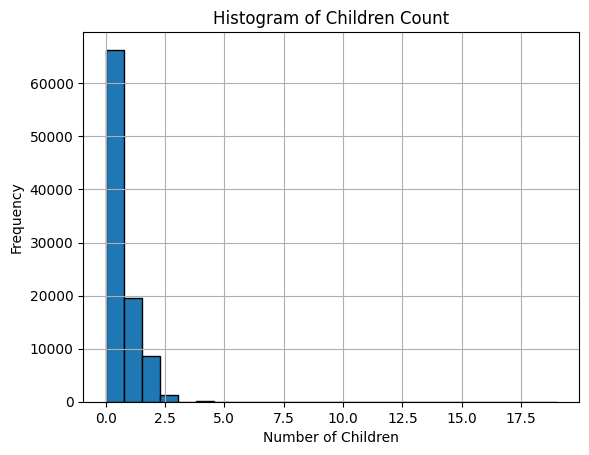

In [61]:
# Plotting histogram of Children Count
credit_application_df['children_count'].hist(edgecolor='black', bins=25)
plt.title('Histogram of Children Count')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()


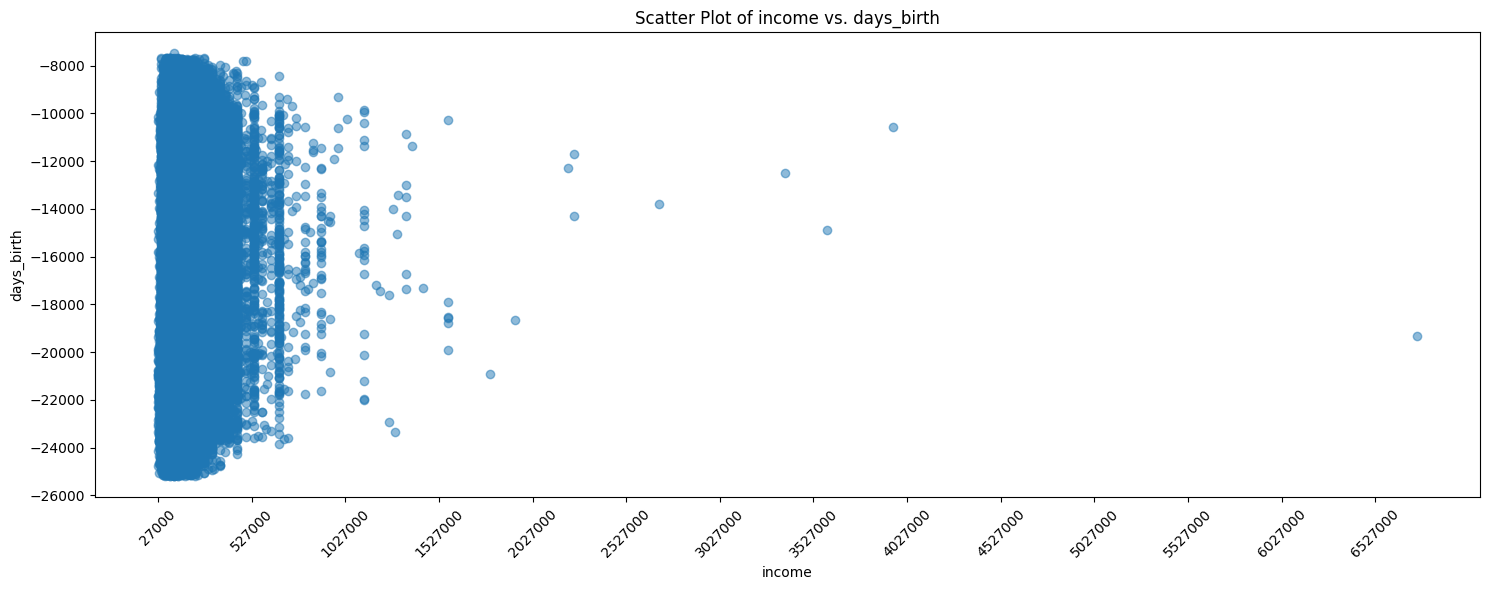

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def plot_scatter(df, x_column, y_column, x_interval, x_tresh):
    # Menghapus outlier dari DataFrame
    df_ = df[df['income'] <= x_tresh]

    # Membuat figur dengan ukuran yang disesuaikan
    plt.figure(figsize=(15,6))

    # Membuat scatter plot
    plt.scatter(df_['income'], df_[y_column], alpha=0.5)
    plt.title(f'Scatter Plot of {x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    # Mengatur format penampilan angka tanpa format ilmiah
    plt.ticklabel_format(style='plain', axis='x')

    # Mengatur interval tick pada sumbu x dengan selisih 50.000
    x_ticks = np.arange(df_[x_column].min(), df_[x_column].max(), 500000)
    plt.xticks(x_ticks, rotation=45)

    # Memastikan sumbu y memiliki label dalam format integer
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()  # Menyesuaikan layout plot agar tidak ada label yang terpotong
    plt.show()

plot_scatter(credit_application_df, 'income', 'days_birth', 500000, 1.170000e+07)


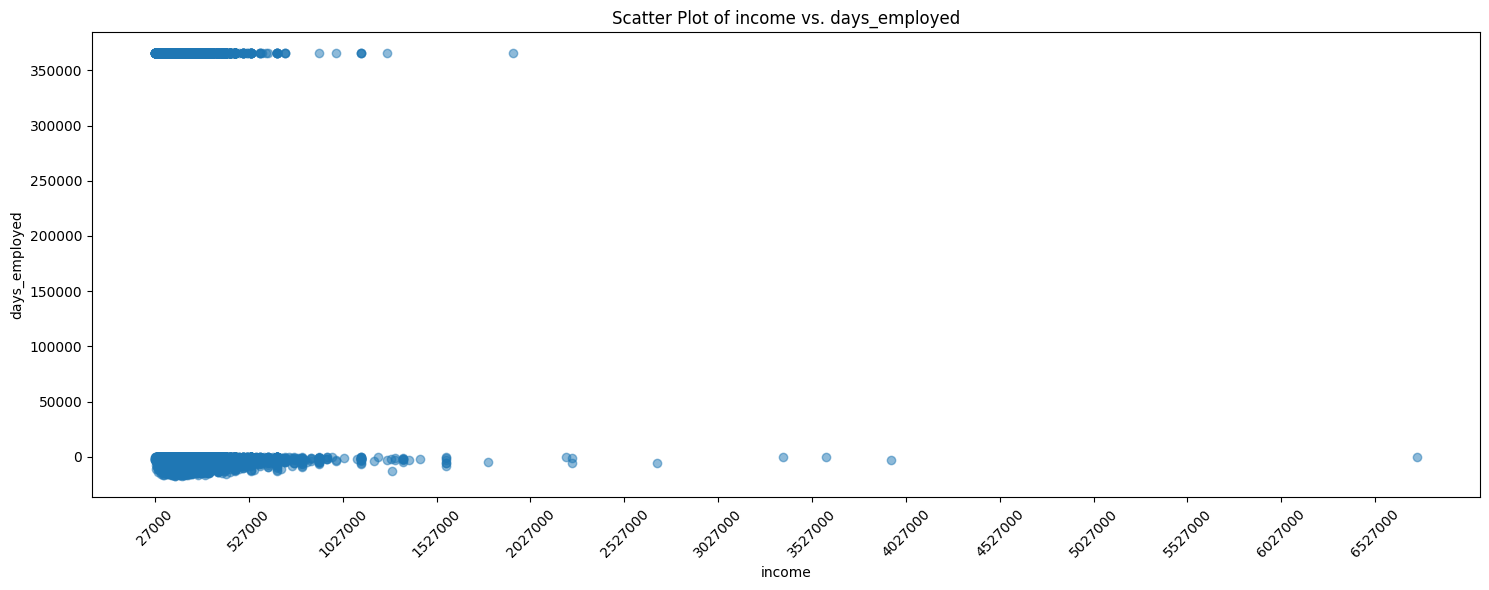

In [71]:
plot_scatter(credit_application_df, 'income', 'days_employed', 500000, 1.170000e+07)

/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_16402/2764190180.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = input_df.corr()


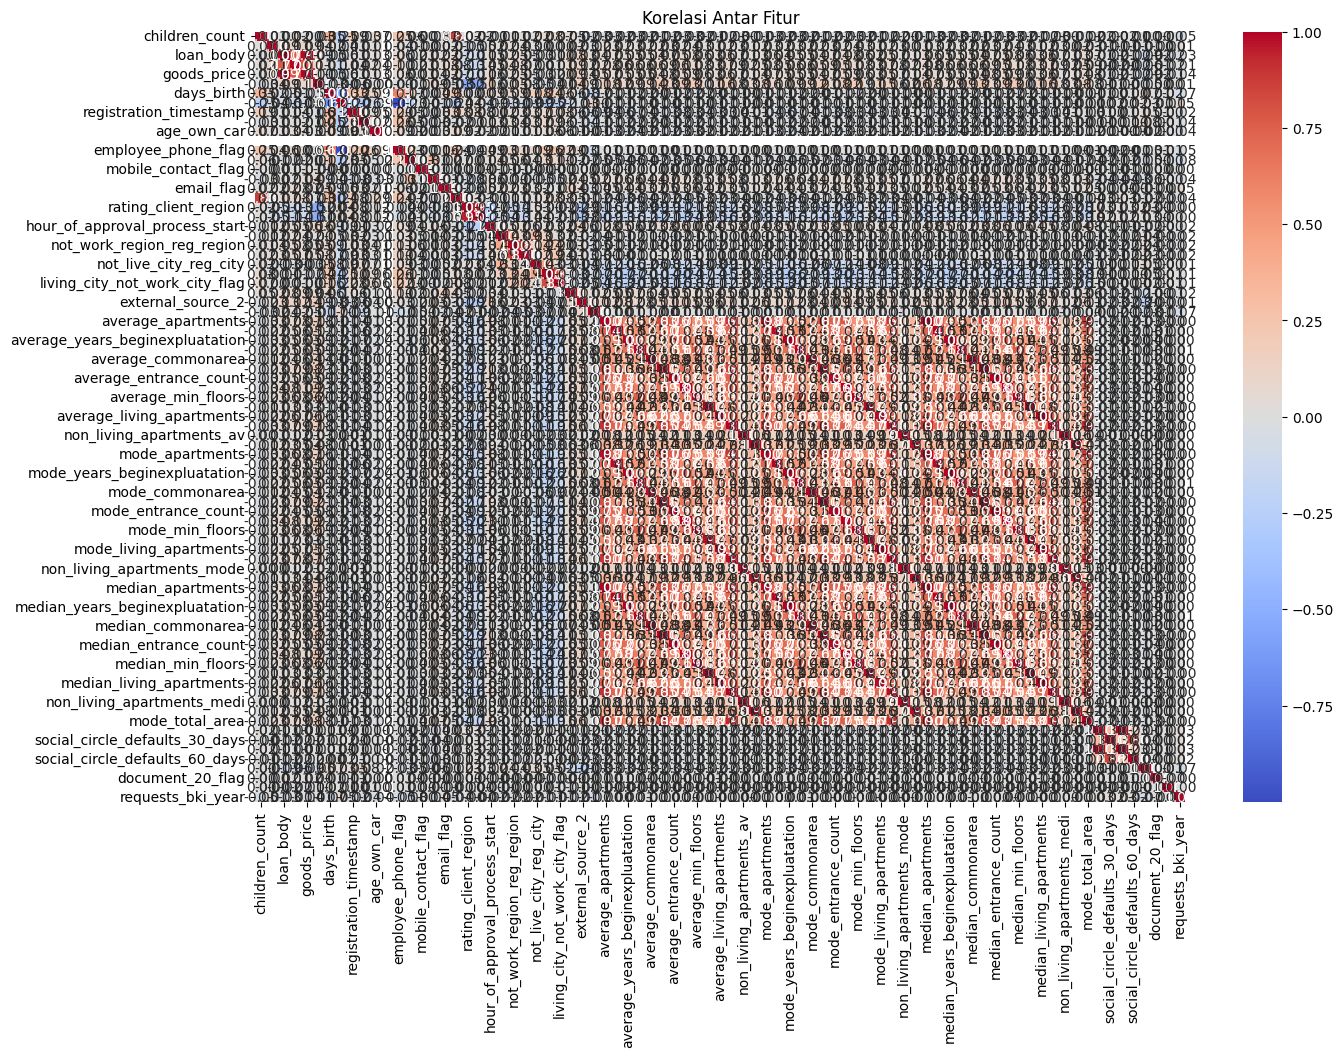

In [72]:
import seaborn as sns

def corr_metr_plot(input_df):
    # Menghitung matriks korelasi
    corr_matrix = input_df.corr()

    # Membuat heatmap
    plt.figure(figsize=(15, 10))  # Mengatur ukuran figur
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

    plt.title('Korelasi Antar Fitur')
    plt.show()
corr_metr_plot(credit_application_df)

/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_16402/902540840.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = credit_application_df.corr()


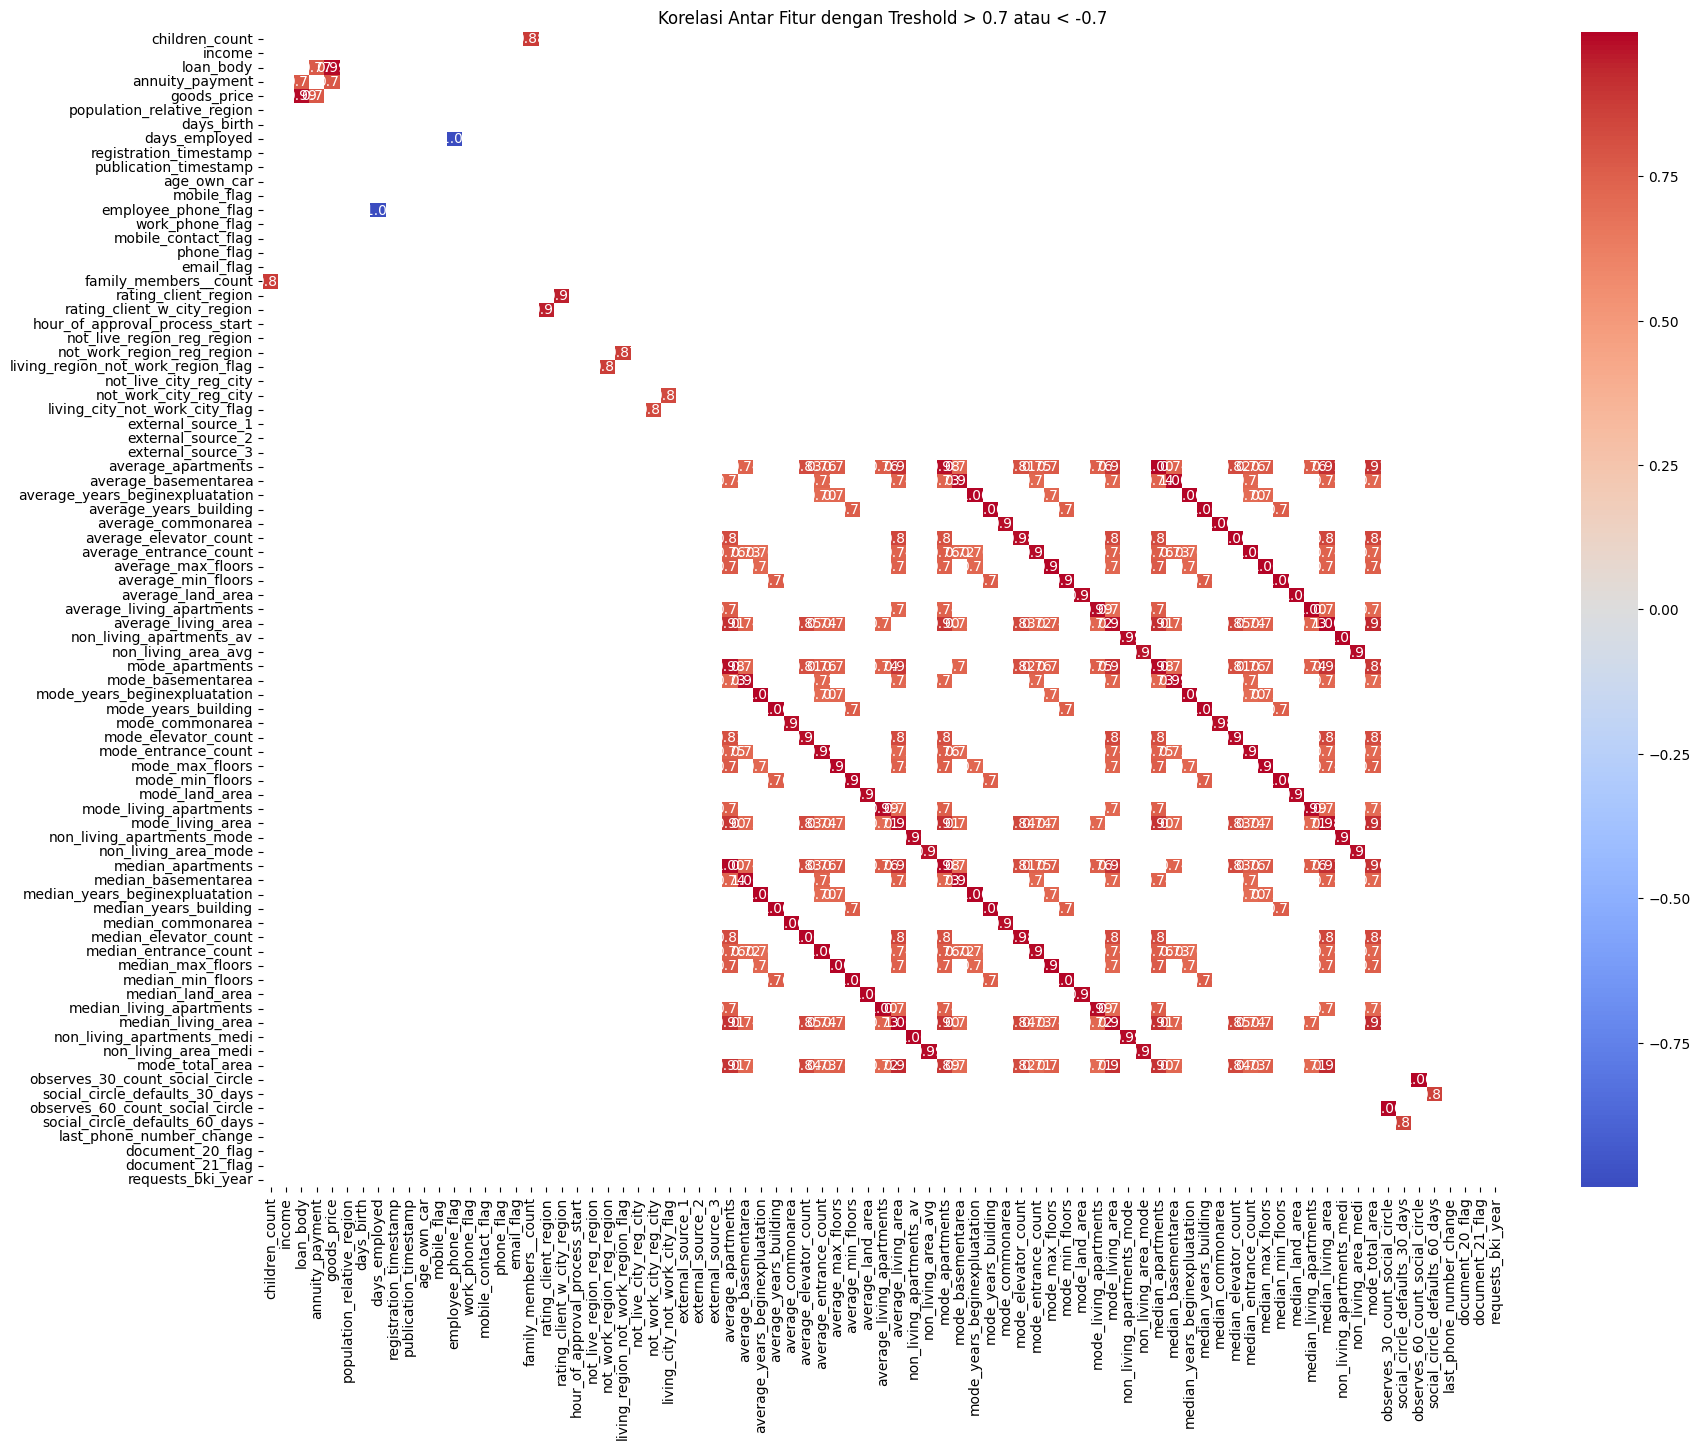

In [74]:
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = credit_application_df.corr()
threshold = 0.7

# Filter matriks korelasi untuk hanya menampilkan nilai dengan korelasi > threshold atau < -threshold
filtered_corr = corr_matrix[(np.abs(corr_matrix) >= threshold) & (corr_matrix != 1)]

# Membuat heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', mask=filtered_corr.isnull())
plt.title('Korelasi Antar Fitur dengan Treshold > 0.7 atau < -0.7')
plt.show()


In [76]:
target_df = run_query("queries/DATASET_TARGET.sql")
target_df.set_index(['reco_id_curr'], inplace=True)
print(len(target_df))

95964


In [166]:
# Melakukan inner join
credit_app_target_df = credit_application_df.merge(target_df, on='reco_id_curr', how='inner')
credit_app_target_df.head()

reco_id_curr contract_type_name gender own_car_flag  \
0  250865db9679b963f8053cea33eb0f86         Cash loans      M            Y   
1  73e474ce3790236a26bb05cc806b254d         Cash loans      F            N   
2  bbead8b3dd56a68ac6744d0028aca009         Cash loans      M            Y   
3  ece1f89b0bfae8748f44c138346ad267         Cash loans      F            N   
4  16a5efff61d95fd7f8de14d186a69c01         Cash loans      F            N   

  own_realty_flag  children_count    income  loan_body  annuity_payment  \
0               N               0  180000.0   953460.0          66357.0   
1               N               0   85500.0   381528.0          14512.5   
2               Y               0  405000.0  1006920.0          42660.0   
3               Y               2   81000.0   286704.0          15682.5   
4               Y               2   99000.0   450000.0          30573.0   

   goods_price  ... emergency_state_mode observes_30_count_social_circle  \
0     900000.0  ...                  NaN                             0.0   
1     315000.0  ...                   No                             1.0   
2     900000.0  ...                  NaN                             2.0   
3     247500.0  ...                  NaN                            10.0   
4     450000.0  ...                   No                             0.0   

  social_circle_defaults_30_days observes_60_count_social_circle  \
0                            0.0                             0.0   
1                            0.0                             1.0   
2                            0.0                             2.0   
3                            0.0                            10.0   
4                            0.0                             0.0   

  social_circle_defaults_60_days  last_phone_number_change  document_20_flag  \
0                            0.0                    -420.0                 0   
1                            0.0                    -433.0                 0   
2                            0.0                   -1584.0                 0   
3                            0.0                       0.0                 0   
4                            0.0                       0.0                 0   

   document_21_flag  requests_bki_year  target  
0                 0                1.0       0  
1                 0                1.0       0  
2                 0                0.0       0  
3                 0                0.0       0  
4                 0                1.0       1  

[5 rows x 99 columns]

In [154]:
credit_app_target_df.set_index(['reco_id_curr'], inplace=True)
len(credit_app_target_df.columns)

98

### Korelasi

In [128]:
# Menghitung matriks korelasi
correlation_matrix = credit_app_target_df.corr()

# Mengambil korelasi antara setiap fitur dengan target
feature_target_corr = correlation_matrix['target'].drop('target')  # kita drop 'target' untuk menghindari korelasi target dengan dirinya sendiri

# Menampilkan korelasi antara setiap fitur dengan target
print(feature_target_corr)


/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_16402/506638384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = credit_app_target_df.corr()


children_count                        0.023680
income                                0.007530
loan_body                            -0.025188
annuity_payment                      -0.007854
goods_price                          -0.035010
population_relative_region           -0.032766
days_birth                            0.078851
days_employed                        -0.046568
registration_timestamp                0.041726
publication_timestamp                 0.049899
age_own_car                           0.008724
mobile_flag                                NaN
employee_phone_flag                   0.047563
work_phone_flag                       0.026599
mobile_contact_flag                   0.003128
phone_flag                           -0.026231
email_flag                           -0.004592
family_members__count                 0.013859
rating_client_region                  0.053967
rating_client_w_city_region           0.055721
hour_of_approval_process_start       -0.021095
not_live_regi

In [155]:
# Korelasi dengan Target:
tresholds = [0.05]
for tresh in tresholds:
    correlations = credit_app_target_df.corr()['target'].sort_values(ascending=False)
    selected_features_corr = correlations[correlations.abs() > tresh].index.tolist()
    selected_features_corr.remove('target')
    print(f"Fitur yang dipilih berdasarkan threshold {tresh}: {selected_features_corr}")

/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_16402/3700089170.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = credit_app_target_df.corr()['target'].sort_values(ascending=False)


Fitur yang dipilih berdasarkan threshold 0.05: ['days_birth', 'last_phone_number_change', 'rating_client_w_city_region', 'rating_client_region', 'not_work_city_reg_city', 'external_source_1', 'external_source_3', 'external_source_2']


In [160]:
# Korelasi Antar Fitur (Menghindari multicollinearity)

def remove_highly_correlated_features(df, threshold=0.9):
    """
    Menghapus fitur yang memiliki korelasi lebih dari ambang batas tertentu dengan fitur lainnya.
    
    Parameters:
    - df: DataFrame yang berisi fitur-fitur yang akan diperiksa.
    - threshold: Ambang batas korelasi.
    
    Returns:
    - DataFrame yang telah dikurangi fiturnya.
    """
    # Hanya mengambil kolom numerik untuk korelasi
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr().abs()
    
    # Dapatkan matriks segitiga atas dari matriks korelasi
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Temukan indeks kolom fitur yang memiliki korelasi lebih dari ambang batas
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    reduced_df = df.drop(columns=to_drop)
    print("to drop: "+str(to_drop))
    
    return reduced_df

# Asumsikan credit_app_target_df adalah DataFrame Anda
reduced_data = remove_highly_correlated_features(credit_app_target_df)

# print("Fitur asli:", credit_app_target_df.columns)
# print("\nFitur setelah penghapusan berdasarkan korelasi antar fitur:", reduced_data.columns)

to drop: ['goods_price', 'employee_phone_flag', 'rating_client_w_city_region', 'average_living_area', 'mode_apartments', 'mode_basementarea', 'mode_years_beginexpluatation', 'mode_years_building', 'mode_commonarea', 'mode_elevator_count', 'mode_entrance_count', 'mode_max_floors', 'mode_min_floors', 'mode_land_area', 'mode_living_apartments', 'mode_living_area', 'non_living_apartments_mode', 'non_living_area_mode', 'median_apartments', 'median_basementarea', 'median_years_beginexpluatation', 'median_years_building', 'median_commonarea', 'median_elevator_count', 'median_entrance_count', 'median_max_floors', 'median_min_floors', 'median_land_area', 'median_living_apartments', 'median_living_area', 'non_living_apartments_medi', 'non_living_area_medi', 'mode_total_area', 'observes_60_count_social_circle']


In [195]:
cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
gabung_df = cred_app_df.merge(target_df, on='reco_id_curr', how='inner')
# gabung_df.set_index(['reco_id_curr'], inplace=True)
reduced_data = remove_highly_correlated_features(gabung_df)

to drop: ['goods_price', 'employee_phone_flag', 'rating_client_w_city_region', 'average_living_area', 'mode_apartments', 'mode_basementarea', 'mode_years_beginexpluatation', 'mode_years_building', 'mode_commonarea', 'mode_elevator_count', 'mode_entrance_count', 'mode_max_floors', 'mode_min_floors', 'mode_land_area', 'mode_living_apartments', 'mode_living_area', 'non_living_apartments_mode', 'non_living_area_mode', 'median_apartments', 'median_basementarea', 'median_years_beginexpluatation', 'median_years_building', 'median_commonarea', 'median_elevator_count', 'median_entrance_count', 'median_max_floors', 'median_min_floors', 'median_land_area', 'median_living_apartments', 'median_living_area', 'non_living_apartments_medi', 'non_living_area_medi', 'mode_total_area', 'observes_60_count_social_circle']


In [189]:
gabung_df.head()

reco_id_curr contract_type_name gender own_car_flag  \
0  250865db9679b963f8053cea33eb0f86         Cash loans      M            Y   
1  73e474ce3790236a26bb05cc806b254d         Cash loans      F            N   
2  bbead8b3dd56a68ac6744d0028aca009         Cash loans      M            Y   
3  ece1f89b0bfae8748f44c138346ad267         Cash loans      F            N   
4  16a5efff61d95fd7f8de14d186a69c01         Cash loans      F            N   

  own_realty_flag  children_count    income  loan_body  annuity_payment  \
0               N               0  180000.0   953460.0          66357.0   
1               N               0   85500.0   381528.0          14512.5   
2               Y               0  405000.0  1006920.0          42660.0   
3               Y               2   81000.0   286704.0          15682.5   
4               Y               2   99000.0   450000.0          30573.0   

   goods_price  ... document_19_flag document_20_flag document_21_flag  \
0     900000.0  ...                0                0                0   
1     315000.0  ...                0                0                0   
2     900000.0  ...                0                0                0   
3     247500.0  ...                0                0                0   
4     450000.0  ...                0                0                0   

  requests_bki_hour requests_bki_day  requests_bki_week  requests_bki_month  \
0               0.0              0.0                0.0                 0.0   
1               0.0              0.0                0.0                 0.0   
2               0.0              0.0                0.0                 0.0   
3               0.0              0.0                0.0                 0.0   
4               0.0              0.0                0.0                 0.0   

   requests_bki_qrt  requests_bki_year  target  
0               0.0                1.0       0  
1               0.0                1.0       0  
2               1.0                0.0       0  
3               0.0                0.0       0  
4               0.0                1.0       1  

[5 rows x 122 columns]

/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0, 5, 6, 7, 8, 9, 11, 15, 16, 17, 18, 19, 20, 28, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 87, 90, 92, 94, 117, 120] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


F1-score: 0.0062
ROC AUC Score: 0.6084


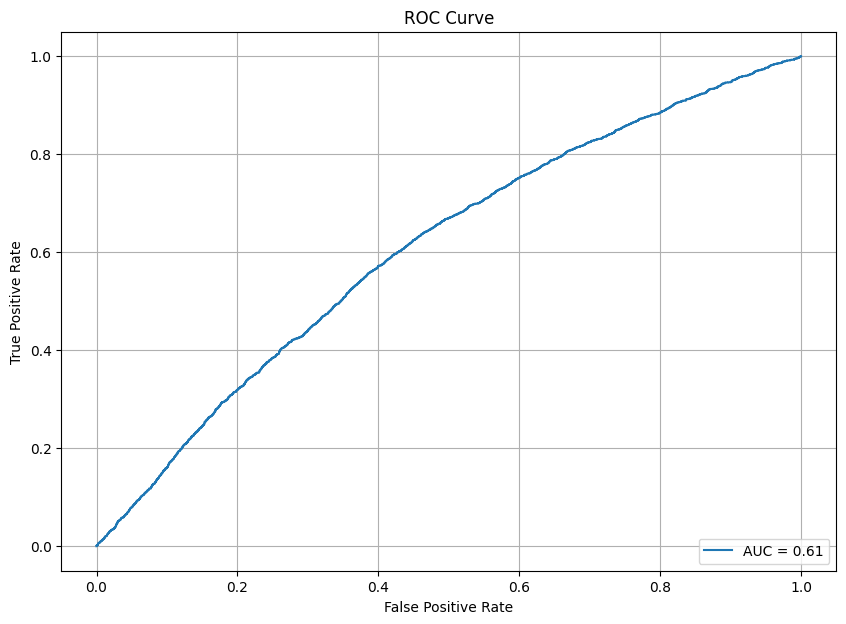

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# 1. Pemisahan Data
X = gabung_df.drop('target', axis=1)
y = gabung_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Pra-pemrosesan Data

# One-hot encoding untuk fitur kategorikal
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Skalakan fitur numerik
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# 3. Pelatihan Model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Prediksi probabilitas untuk AUC ROC
y_prob = clf.predict_proba(X_test_scaled)[:, 1]

# Prediksi label untuk F1-score
y_pred = clf.predict(X_test_scaled)

# 4. Pengukuran Performa
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [186]:
def manual_oversample(X, y):
    # Dapatkan indeks dari kelas minoritas
    minority_class_indices = y[y == 1].index
    majority_class_indices = y[y == 0].index
    
    # Hitung jumlah kelas mayoritas
    num_majority = len(y[y == 0])
    
    # Dapatkan sampel acak dari kelas minoritas
    random_minority_indices = np.random.choice(minority_class_indices, num_majority, replace=True)
    
    # Gabungkan indeks kelas mayoritas dengan sampel acak dari kelas minoritas
    over_sample_indices = np.concatenate([majority_class_indices, random_minority_indices])
    
    # Dapatkan data yang oversampled
    X_oversampled = X.loc[over_sample_indices]
    y_oversampled = y.loc[over_sample_indices]
    
    return X_oversampled, y_oversampled

In [198]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

# Ambil data dari DB
#df = run_query("coba6.sql")
df = gabung_df
# Menghapus kolom ID
df.drop(columns=['reco_id_curr', 'annuity_payment'], inplace=True)

# Mengisi missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding kolom kategorikal
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split Train vs Test Data
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_train_resampled, y_train_resampled = manual_oversample(X_train_df, y_train)

In [199]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# Prediksi dengan kelas
y_pred = lr.predict(X_test_scaled)

# Prediksi dengan probabilitas
y_pred_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:\n", report)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Menyimpan model, scaler, dan encoders
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'data_scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

Accuracy Score: 0.6823
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     17722
           1       0.15      0.69      0.25      1471

    accuracy                           0.68     19193
   macro avg       0.56      0.69      0.52     19193
weighted avg       0.90      0.68      0.76     19193

ROC AUC Score: 0.7412


/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


['label_encoders.pkl']

### Uji Chi-Square

In [90]:
from scipy.stats import chi2_contingency

for column in credit_app_target_df.select_dtypes(include=['object', 'category']).columns:  # Anda bisa mengganti 'object' dan 'category' dengan tipe data kategorikal Anda
    contingency = pd.crosstab(credit_app_target_df[column], credit_app_target_df['target'])
    chi2, p, _, _ = chi2_contingency(contingency)
    if p < 0.05:
        print(f"Uji Chi-Square untuk {column}: Chi2 = {chi2}, p = {p}")


Uji Chi-Square untuk contract_type_name: Chi2 = 77.32826329163886, p = 1.4477934723725658e-18
Uji Chi-Square untuk gender: Chi2 = 290.4534053338297, p = 8.488762964522965e-64
Uji Chi-Square untuk own_car_flag: Chi2 = 16.755813464835114, p = 4.2511812149276134e-05
Uji Chi-Square untuk own_realty_flag: Chi2 = 9.754895872426804, p = 0.001788457723701345
Uji Chi-Square untuk income_type_name: Chi2 = 350.0764681274328, p = 1.6851570229556573e-73
Uji Chi-Square untuk education_type_name: Chi2 = 261.63492653066845, p = 2.026144975662634e-55
Uji Chi-Square untuk family_status_name: Chi2 = 127.22255883164843, p = 1.528553711179409e-26
Uji Chi-Square untuk housing_type_name: Chi2 = 130.74996408899514, p = 1.6497314450396215e-26
Uji Chi-Square untuk type_of_occupation: Chi2 = 382.46838279753445, p = 8.508903281697535e-71
Uji Chi-Square untuk type_of_organization: Chi2 = 540.6938531123138, p = 5.694114543475768e-80
Uji Chi-Square untuk fondkapremon_mode: Chi2 = 9.632128578753186, p = 0.02196649256

### Uji ANOVA

In [89]:
from scipy.stats import f_oneway

for column in credit_app_target_df.select_dtypes(include=[np.number]).columns:
    groups = [credit_app_target_df[column][credit_app_target_df['target'] == value] for value in credit_app_target_df['target'].unique()]
    f_stat, p = f_oneway(*groups)
    if p < 0.05:
        print(f"Uji ANOVA untuk {column}: F = {f_stat}, p = {p}")


Uji ANOVA untuk children_count: F = 53.84112053881562, p = 2.1908345543941479e-13
Uji ANOVA untuk income: F = 5.44135845031416, p = 0.01966742529693524
Uji ANOVA untuk loan_body: F = 60.92156325944391, p = 5.999042412222735e-15
Uji ANOVA untuk annuity_payment: F = 5.920533024273453, p = 0.014967243801719588
Uji ANOVA untuk goods_price: F = 117.76502676035922, p = 2.0249408007596023e-27
Uji ANOVA untuk population_relative_region: F = 103.13618972903335, p = 3.2184051527244738e-24
Uji ANOVA untuk days_birth: F = 600.3761935806607, p = 3.5437033037833666e-132
Uji ANOVA untuk days_employed: F = 208.5514864828444, p = 3.187898073494683e-47
Uji ANOVA untuk registration_timestamp: F = 167.36450161617648, p = 2.9980857650478115e-38
Uji ANOVA untuk publication_timestamp: F = 239.52907637339183, p = 5.790755167865594e-54
Uji ANOVA untuk age_own_car: F = 7.303893558353594, p = 0.006881745327076072
Uji ANOVA untuk employee_phone_flag: F = 217.58328882813893, p = 3.4476021769139405e-49
Uji ANOVA un

/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Uji ANOVA untuk median_living_apartments: F = 64.6210901650026, p = 9.18016908161052e-16
Uji ANOVA untuk median_living_area: F = 130.8183755528075, p = 2.8388172660336577e-30
Uji ANOVA untuk non_living_area_medi: F = 38.7529929759829, p = 4.829535854236191e-10
Uji ANOVA untuk mode_total_area: F = 140.79602744101288, p = 1.8787479229430876e-32
Uji ANOVA untuk observes_30_count_social_circle: F = 12.984659360238659, p = 0.00031421219182727354
Uji ANOVA untuk social_circle_defaults_30_days: F = 57.776968444271056, p = 2.962389737830477e-14
Uji ANOVA untuk observes_60_count_social_circle: F = 12.735131439320346, p = 0.00035902550299982323
Uji ANOVA untuk social_circle_defaults_60_days: F = 49.05451179800878, p = 2.5057542422470897e-12
Uji ANOVA untuk last_phone_number_change: F = 305.8964172638356, p = 2.1853312601725136e-68
Uji ANOVA untuk requests_bki_year: F = 30.623147398595904, p = 3.141489200278769e-08
Uji ANOVA untuk target: F = inf, p = 0.0


### Feature Importance Decision Tree

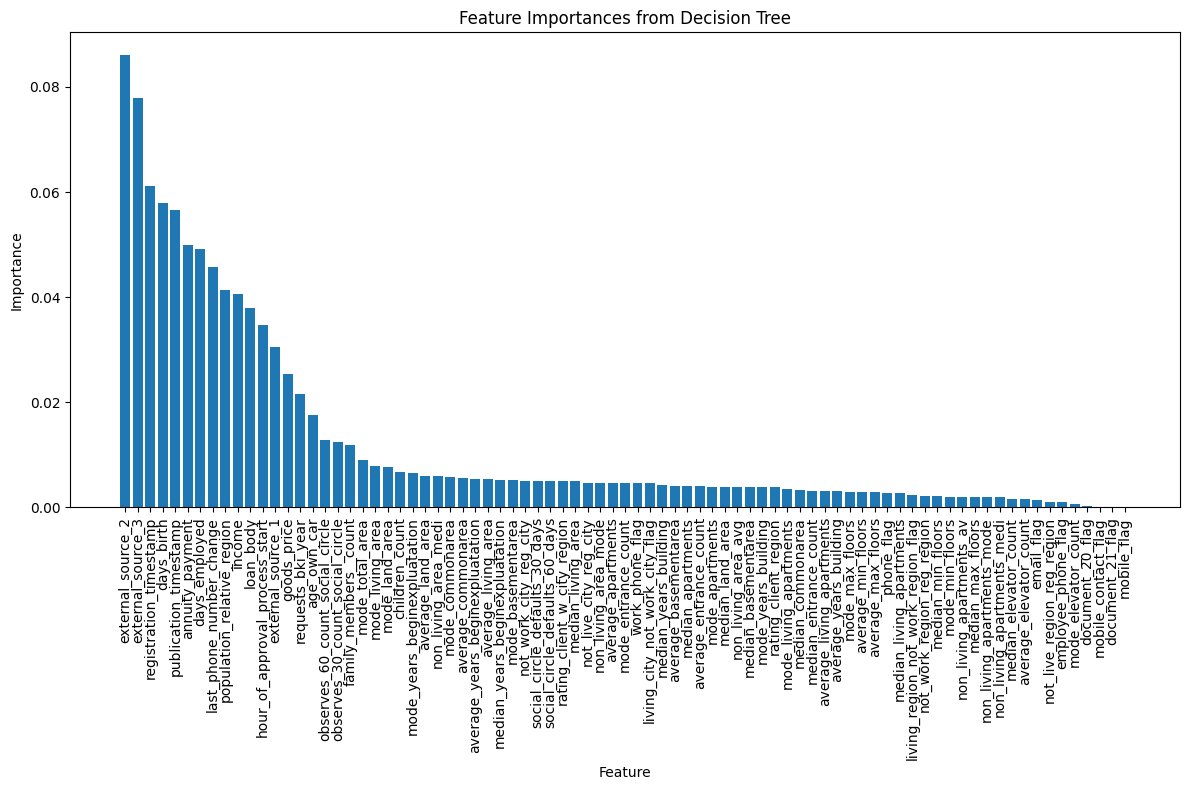

In [91]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Memisahkan fitur dan target
X = credit_app_target_df.drop('target', axis=1).select_dtypes([np.number])  # Mengambil hanya fitur numerik untuk kesederhanaan
y = credit_app_target_df['target']

# Membuat model dan melatihnya
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Mengambil feature importance dan menampilkannya dalam bentuk plot
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Mengurutkan fitur berdasarkan importance

# Plotting
plt.figure(figsize=(12,8))
plt.title('Feature Importances from Decision Tree')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


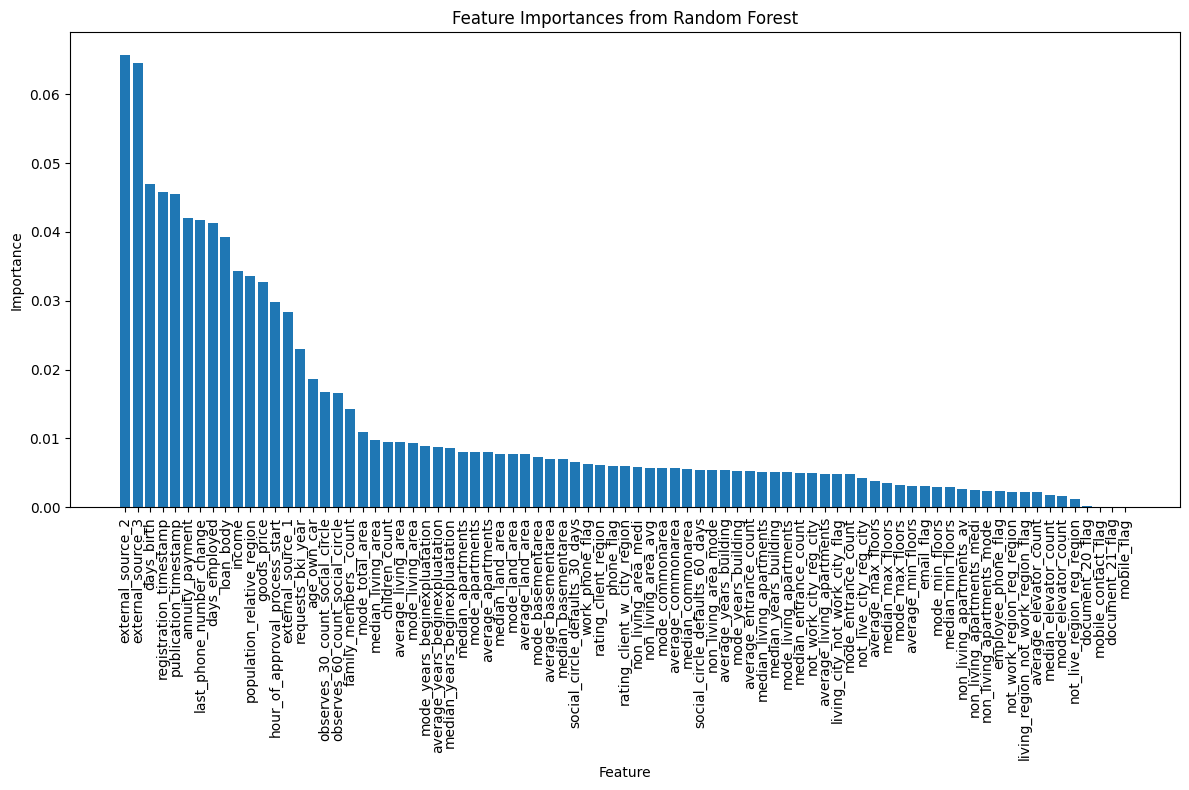

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Mengambil feature importance dari model
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]  # Mengurutkan fitur berdasarkan importance

# Plotting feature importance
plt.figure(figsize=(12,8))
plt.title('Feature Importances from Random Forest')
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices_rf], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


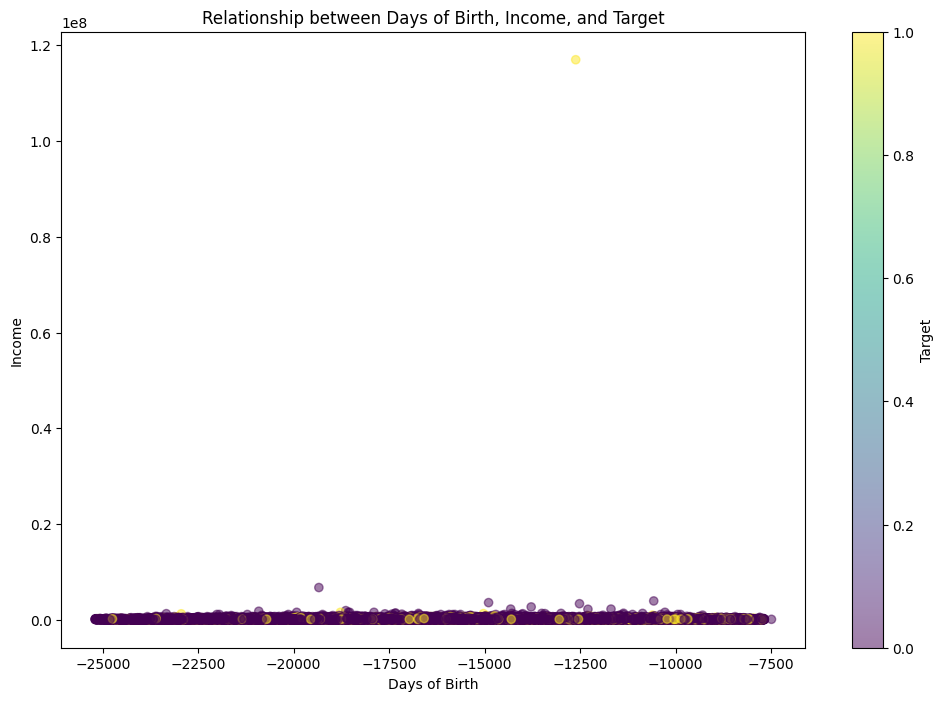

In [99]:
import matplotlib.pyplot as plt

# Ambil data yang diperlukan
days_birth = credit_app_target_df['days_birth']
income = credit_app_target_df['income']
colors = credit_app_target_df['target']

# Buat scatter plot
plt.figure(figsize=(12,8))
scatter = plt.scatter(days_birth, income, c=colors, alpha=0.5, cmap="viridis")
plt.title('Relationship between Days of Birth, Income, and Target')
plt.xlabel('Days of Birth')
plt.ylabel('Income')
plt.colorbar(scatter, label='Target')
plt.show()


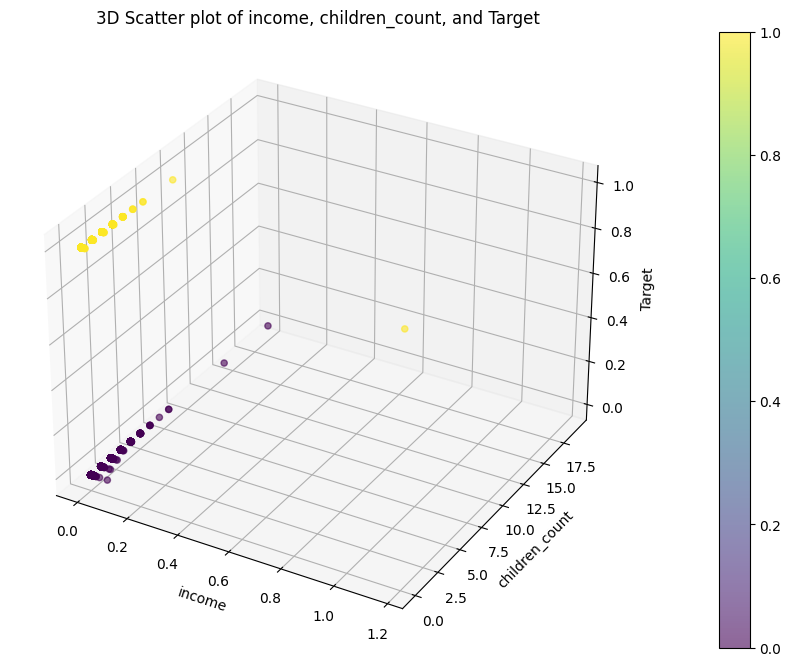

In [102]:
from mpl_toolkits.mplot3d import Axes3D

# Inisialisasi figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Ambil data
income = credit_app_target_df['income']
children_count = credit_app_target_df['children_count']
target = credit_app_target_df['target']

# Plot data
scatter = ax.scatter(income, children_count, target, c=target, cmap='viridis', depthshade=True, alpha=0.6)
ax.set_xlabel('income')
ax.set_ylabel('children_count')
ax.set_zlabel('Target')
ax.set_title('3D Scatter plot of income, children_count, and Target')

# Tampilkan colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)

plt.show()


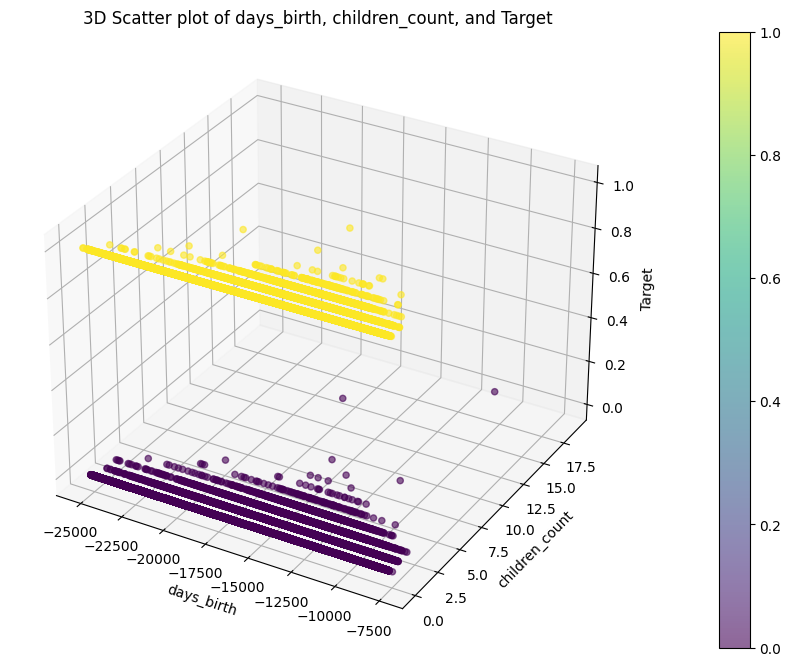

In [103]:
from mpl_toolkits.mplot3d import Axes3D

# Inisialisasi figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Ambil data
days_birth = credit_app_target_df['days_birth']
children_count = credit_app_target_df['children_count']
target = credit_app_target_df['target']

# Plot data
scatter = ax.scatter(days_birth, children_count, target, c=target, cmap='viridis', depthshade=True, alpha=0.6)
ax.set_xlabel('days_birth')
ax.set_ylabel('children_count')
ax.set_zlabel('Target')
ax.set_title('3D Scatter plot of days_birth, children_count, and Target')

# Tampilkan colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)

plt.show()


In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

# Buat salinan dari dataset
X_encoded = X.copy()

# Ubah fitur kategorikal menjadi numerik dengan LabelEncoder
label_encoders = {}
for column in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le

# Lanjutkan dengan RFE seperti sebelumnya
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_encoded, y)

selected_features = X_encoded.columns[selector.support_]
print("Fitur terpilih:", selected_features)

feature_ranking = dict(zip(X_encoded.columns, selector.ranking_))
print("Ranking fitur:", feature_ranking)


Fitur terpilih: Index(['days_birth', 'registration_timestamp', 'publication_timestamp',
       'external_source_2', 'external_source_3'],
      dtype='object')
Ranking fitur: {'contract_type_name': 80, 'gender': 56, 'own_car_flag': 66, 'own_realty_flag': 53, 'children_count': 36, 'income': 7, 'loan_body': 5, 'annuity_payment': 2, 'goods_price': 8, 'type_suite_name': 39, 'income_type_name': 44, 'education_type_name': 48, 'family_status_name': 28, 'housing_type_name': 42, 'population_relative_region': 6, 'days_birth': 1, 'days_employed': 3, 'registration_timestamp': 1, 'publication_timestamp': 1, 'age_own_car': 19, 'mobile_flag': 93, 'employee_phone_flag': 88, 'work_phone_flag': 62, 'mobile_contact_flag': 91, 'phone_flag': 64, 'email_flag': 78, 'type_of_occupation': 15, 'family_members__count': 23, 'rating_client_region': 47, 'rating_client_w_city_region': 58, 'start_weekday_appr_process': 16, 'hour_of_approval_process_start': 9, 'not_live_region_reg_region': 89, 'not_work_region_reg_reg

Fitur terpilih dengan Lasso: Index(['gender', 'education_type_name', 'days_birth', 'external_source_1',
       'external_source_2', 'external_source_3'],
      dtype='object')


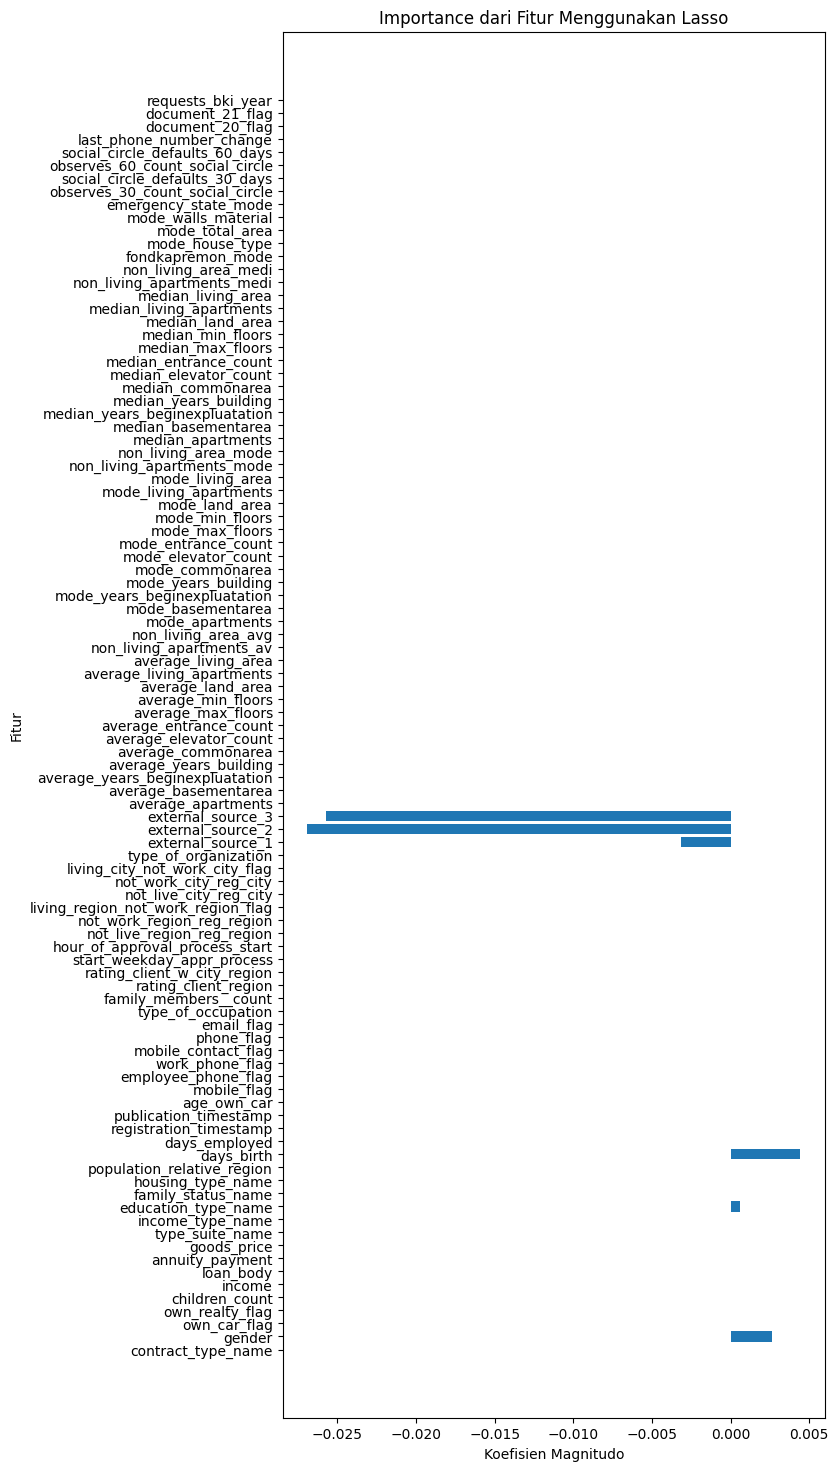

In [112]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Penting untuk menskalakan data sebelum menggunakan Lasso karena regularisasi dipengaruhi oleh skala fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Aplikasikan Lasso
lasso = Lasso(alpha=0.01)  # Anda mungkin perlu menyesuaikan nilai alpha
lasso.fit(X_scaled, y)

# Dapatkan fitur yang signifikan (koefisien tidak nol)
selected_features = X_encoded.columns[lasso.coef_ != 0]
print("Fitur terpilih dengan Lasso:", selected_features)

# Untuk visualisasi, Anda bisa plot koefisien untuk setiap fitur
import matplotlib.pyplot as plt
import numpy as np

coefs = lasso.coef_
plt.figure(figsize=(7, 18))
plt.barh(X_encoded.columns, coefs)
plt.xlabel("Koefisien Magnitudo")
plt.ylabel("Fitur")
plt.title("Importance dari Fitur Menggunakan Lasso")
plt.show()

### PCA

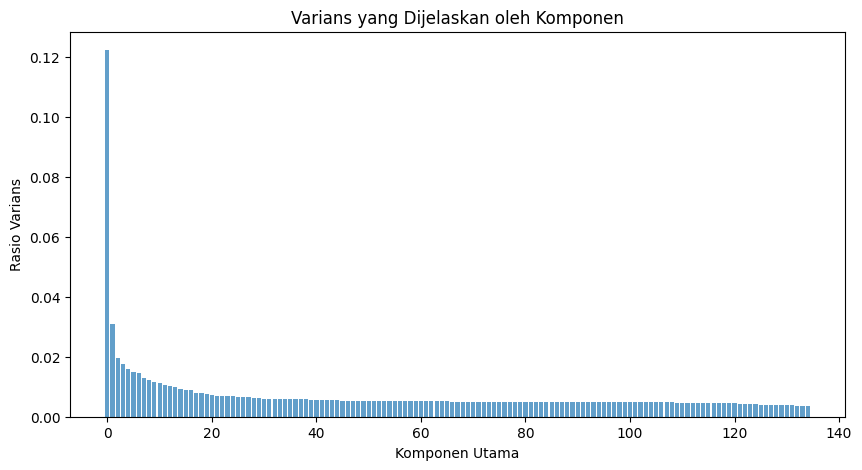

In [116]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumsikan credit_app_target_df adalah DataFrame Anda dan telah dihapus kolom 'target'
data = credit_app_target_df.drop('target', axis=1)

# Menggunakan pandas untuk melakukan one-hot encoding
encoded_data = pd.get_dummies(data, drop_first=True)

# Normalisasi data yang telah diencode
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Menerapkan PCA
pca = PCA(n_components=0.95)  # Menjelaskan 95% dari varians
principal_components = pca.fit_transform(scaled_data)

# Konversi hasil PCA ke DataFrame
principal_df = pd.DataFrame(data=principal_components)

# Plotting varians yang dijelaskan oleh setiap komponen
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center', label='varians individu oleh komponen')
plt.ylabel('Rasio Varians')
plt.xlabel('Komponen Utama')
plt.title('Varians yang Dijelaskan oleh Komponen')
plt.show()


In [202]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# load data baru
df_predict = run_query("coba6_test.sql")

# Load label encoders and scaler first
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('data_scaler.pkl')

# Simpan kolom 'reco_id_curr' untuk digabungkan lagi nanti
reco_id_curr = df_predict['reco_id_curr'].copy()
df_predict.drop(columns=['reco_id_curr'], inplace=True)

# Mengisi missing values
for col in df_predict.select_dtypes(include=['float64', 'int64']).columns:
    df_predict[col].fillna(df_predict[col].median(), inplace=True)
for col in df_predict.select_dtypes(include=['object']).columns:
    df_predict[col].fillna(df_predict[col].mode()[0], inplace=True)

missing_features = ['annuity_payment.1', 'goods_price.1', 'loan_body.1']
for feature in missing_features:
    df_predict[feature] = 0  # atau nilai lain yang Anda inginkan


# 1. Strategi Ignore dan Label Encoding
for col in df_predict.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        # Cari label yang belum pernah dilihat
        unseen_labels = set(df_predict[col]) - set(label_encoders[col].classes_)
        
        # Gantikan label yang belum pernah dilihat dengan NaN atau 'lainnya'
        df_predict[col] = df_predict[col].replace(unseen_labels, np.nan)  # atau gantikan np.nan dengan 'lainnya'
        
        # Sekarang lakukan transform
        df_predict[col] = label_encoders[col].transform(df_predict[col].fillna(df_predict[col].mode()[0]))

# Penskalaan fitur
df_predict_scaled = scaler.transform(df_predict)

# 2. Prediksi menggunakan probabilitas
model = joblib.load('logistic_regression_model.pkl')
predicted_proba = model.predict_proba(df_predict_scaled)[:, 1]

# 3. Gabungkan probabilitas prediksi dengan reco_id_curr dalam DataFrame
result_df = pd.DataFrame({
    'reco_id_curr': reco_id_curr,
    'predicted_proba': predicted_proba
})

print("ok")


/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_16402/1444558418.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[col].fillna(df_predict[col].median(), inplace=True)
/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_16402/1444558418.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[col].fillna(df_predict[col].median(), inplace=True)
/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_16402/1444558418.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- annuity_payment
- annuity_payment.1
- avg_credit_day_overdue
- contract_status_name
- credit_currency
- ...


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Mulai dengan salinan dari gabung_df
df = gabung_df.copy()

# Mengisi missing values numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values untuk fitur kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Pastikan tidak ada lagi nilai NaN
assert df.isnull().sum().sum() == 0, "Masih ada NaN di dataset!"

# Lakukan one-hot encoding
X_encoded = pd.get_dummies(df.drop('target', axis=1))
y = df['target']

# Hitung Mutual Information
mi = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,8))
mi_series.plot(kind='bar')
plt.title('Feature Importances based on Mutual Information')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Menampilkan fitur berdasarkan ranking MI
print(mi_series)


In [ ]:
filtered_mi_series = mi_series[mi_series > 1.865546e-03]
selected_features = filtered_mi_series.index.tolist()
# Filter selected_features agar hanya berisi fitur yang ada di gabung_df
selected_features = [col for col in selected_features if col in gabung_df.columns]
print(len(selected_features))